# 1.4. Creating an IPython extension with custom magic commands

In [1]:
from IPython.core.magic import (register_line_magic,
                                register_cell_magic)

In [2]:
@register_line_magic
def hello(line):
    if line == 'french':
        print("Salut tout le monde!")
    else:
        print("Hello world!")

In [3]:
%hello

Hello world!


In [4]:
%hello french

Salut tout le monde!


In [5]:
import pandas as pd
from io import StringIO

@register_cell_magic
def csv(line, cell):
    # We create a string buffer containing the
    # contents of the cell.
    sio = StringIO(cell)
    # We use Pandas' read_csv function to parse
    # the CSV string.
    return pd.read_csv(sio)

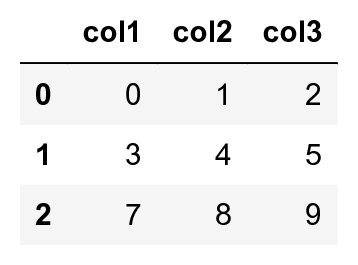

In [6]:
%%csv
col1,col2,col3
0,1,2
3,4,5
7,8,9

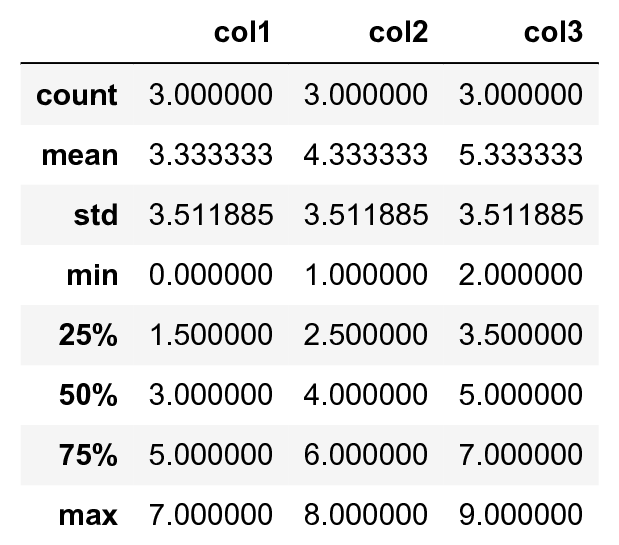

In [7]:
df = _
df.describe()

In [8]:
%%writefile csvmagic.py
import pandas as pd
from io import StringIO

def csv(line, cell):
    sio = StringIO(cell)
    return pd.read_csv(sio)

def load_ipython_extension(ipython):
    """This function is called when the extension is
    loaded. It accepts an IPython InteractiveShell
    instance. We can register the magic with the
    `register_magic_function` method of the shell
    instance."""
    ipython.register_magic_function(csv, 'cell')

Writing csvmagic.py


In [9]:
%load_ext csvmagic

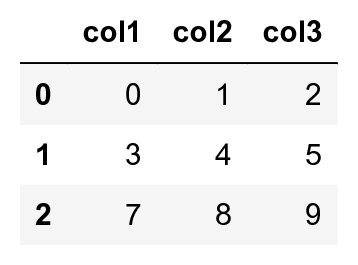

In [10]:
%%csv
col1,col2,col3
0,1,2
3,4,5
7,8,9